In [ ]:
# Core packages
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install matplotlib

# Audio processing
!pip install librosa
!pip install soundata

# Deep learning
!pip install tensorflow

# Audio evaluation metrics
!pip install pesq

# Additional dependencies (might be needed depending on your system)
!pip install resampy  # Used by librosa for resampling
!pip install numba    # Used by librosa for acceleration
!pip install soundfile  # Used by soundata for audio I/O

In [ ]:

# Install pypesq from a maintained fork:
!pip install https://github.com/vBaiCai/python-pesq/archive/master.zip

# Install pystoi:
!pip install pystoi

# Or if that fails, try:
!pip install https://github.com/mpariente/pystoi/archive/master.zip

In [1]:
import numpy as np
import soundata
import librosa
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.metrics import mean_squared_error


In [2]:
import numpy as np
import sys
# Fix for NumPy 2.0 compatibility
if hasattr(np, 'float_'):
    pass  # Already exists (NumPy < 2.0)
else:
    np.float_ = np.float64
    np.int_ = np.int64

##Load dataset, verify download and test sample audios

Clip ID: 100032-3-0-0
Class: dog_bark, Sample Rate: 44100 Hz


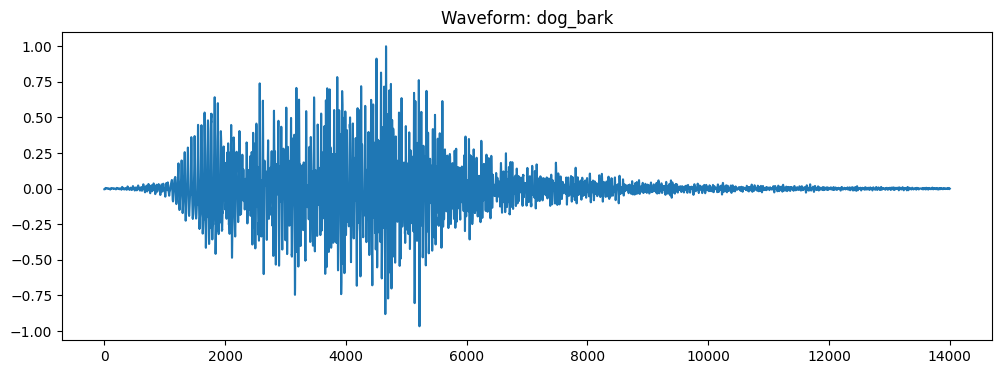

In [3]:
import soundata
import matplotlib.pyplot as plt

path = '/data/users/tqiu5/CleanUNet/urbansound8k'

# Initialize the dataset
urbansound8k = soundata.initialize("urbansound8k", data_home=path)

# # Download the dataset (only need to do this once)
# urbansound8k.download()  # Downloads to ~/sound_datasets/urbansound8k

# Load a specific clip by ID (or use choice_clip() for random)
clip = urbansound8k.clip("100032-3-0-0")  # Example clip ID
print(f"Clip ID: {clip.clip_id}")

# Access audio and metadata
audio, sr = clip.audio  # Load audio data (now a property, not a method)
metadata = clip.to_jams()  # Get metadata

# Get the class label
class_label = metadata.annotations[0].data[0].value
print(f"Class: {class_label}, Sample Rate: {sr} Hz")

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title(f"Waveform: {class_label}")
plt.show()

In [4]:
import os

if  os.path.exists(path):
    print("Dataset downloaded, continue")
else:
    urbansound8k.download()

Dataset downloaded, continue


Class: engine_idling, Duration: 4.00s


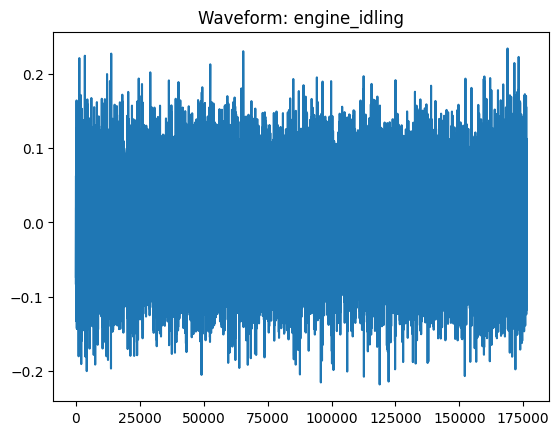

In [5]:
# Load a RANDOM clip

cliprandom = urbansound8k.choice_clip()  # Random selection

audiorandom, srRandom = cliprandom.audio
metadatarandom = cliprandom.to_jams()
class_label = metadatarandom.annotations[0].data[0].value

print(f"Class: {class_label}, Duration: {len(audiorandom)/sr:.2f}s")
plt.plot(audiorandom)
plt.title(f"Waveform: {class_label}")
plt.show()

In [6]:
import numpy as np
from scipy.signal import butter, lfilter
from IPython.display import Audio, display
import matplotlib.pyplot as plt

#Add noise to Urban8k

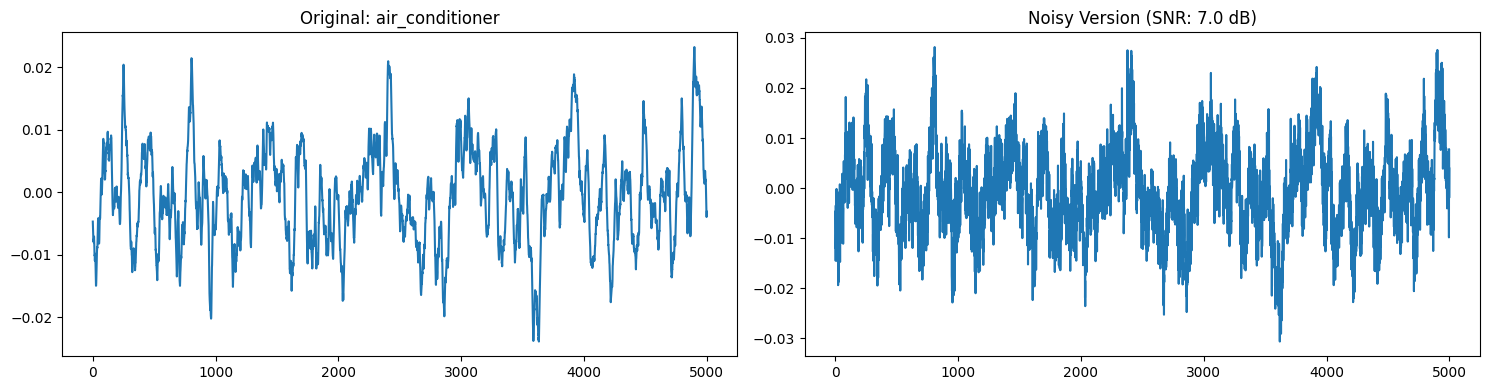

Original:


Noisy:


In [7]:
clip = urbansound8k.choice_clip()
audio, sr = clip.audio
class_label = clip.to_jams().annotations[0].data[0].value

# Add 10% Gaussian noise (adjust noise_level as needed)
noise_level = 0.1
noise = np.random.normal(0, noise_level * np.max(np.abs(audio)), len(audio))
noisy_audio = audio + noise

# Plot comparison
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(audio[:5000])
plt.title(f"Original: {class_label}")

plt.subplot(1, 2, 2)
plt.plot(noisy_audio[:5000])
plt.title(f"Noisy Version (SNR: {10*np.log10(np.var(audio)/np.var(noise)):.1f} dB)")
plt.tight_layout()
plt.show()

# Play audio
print("Original:")
display(Audio(audio, rate=sr))
print("Noisy:")
display(Audio(noisy_audio, rate=sr))

# Save noisy version (optional)
# wavfile.write(f"noisy_{clip.clip_id}.wav", sr, noisy_audio) street music

##Test lowpass filter

In [8]:
def lowpass_filter(audio, cutoff, sr, order=4):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return lfilter(b, a, audio)

# Filter out frequencies above 1000 Hz
filtered_audio = lowpass_filter(noisy_audio, cutoff=1000, sr=sr)

In [9]:
print("Original (+ Noise):")
display(Audio(noisy_audio, rate=sr))

print("\nFiltered (Noise Removed):")
display(Audio(filtered_audio, rate=sr))


Original (+ Noise):



Filtered (Noise Removed):


## Other traditional filters

In [11]:
def bandpass_filter(audio, lowcut, highcut, sr, order=4):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band', analog=False)
    return lfilter(b, a, audio)

In [12]:
def highpass_filter(audio, cutoff, sr, order=4):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return lfilter(b, a, audio)

In [13]:
def notch_filter(audio, cutoff, sr, Q=30):
    nyquist = 0.5 * sr
    freq = cutoff / nyquist
    b, a = butter(2, [freq-0.01, freq+0.01], btype='bandstop', analog=False)
    return lfilter(b, a, audio)

Original (+ Noise):



Filtered (Noise Removed):


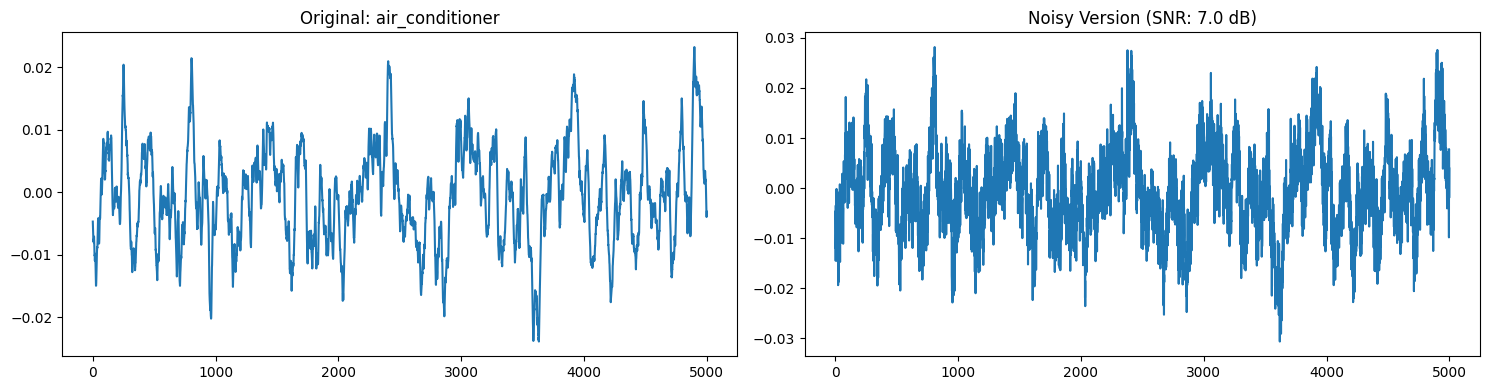

Text(0.5, 1.0, 'cleaned version: air_conditioner')

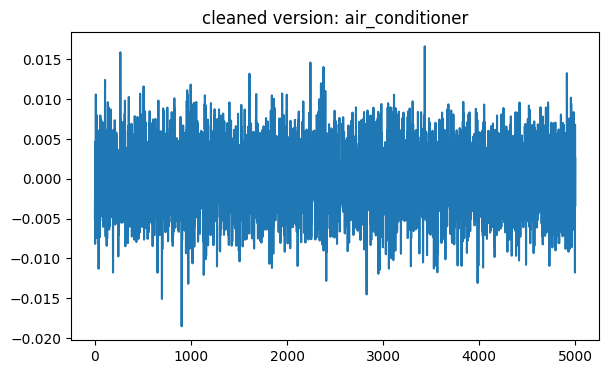

In [14]:
filtered_audio2 = highpass_filter(noisy_audio, cutoff=1000, sr=sr)
print("Original (+ Noise):")
display(Audio(noisy_audio, rate=sr))

print("\nFiltered (Noise Removed):")
display(Audio(filtered_audio, rate=sr))



plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(audio[:5000])
plt.title(f"Original: {class_label}")

plt.subplot(1, 2, 2)
plt.plot(noisy_audio[:5000])
plt.title(f"Noisy Version (SNR: {10*np.log10(np.var(audio)/np.var(noise)):.1f} dB)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(filtered_audio2[:5000])
plt.title(f"cleaned version: {class_label}")

In [ ]:
import soundfile as sf
from pesq import pesq
from pystoi import stoi
import pandas as pd
import seaborn as sns
import denoise



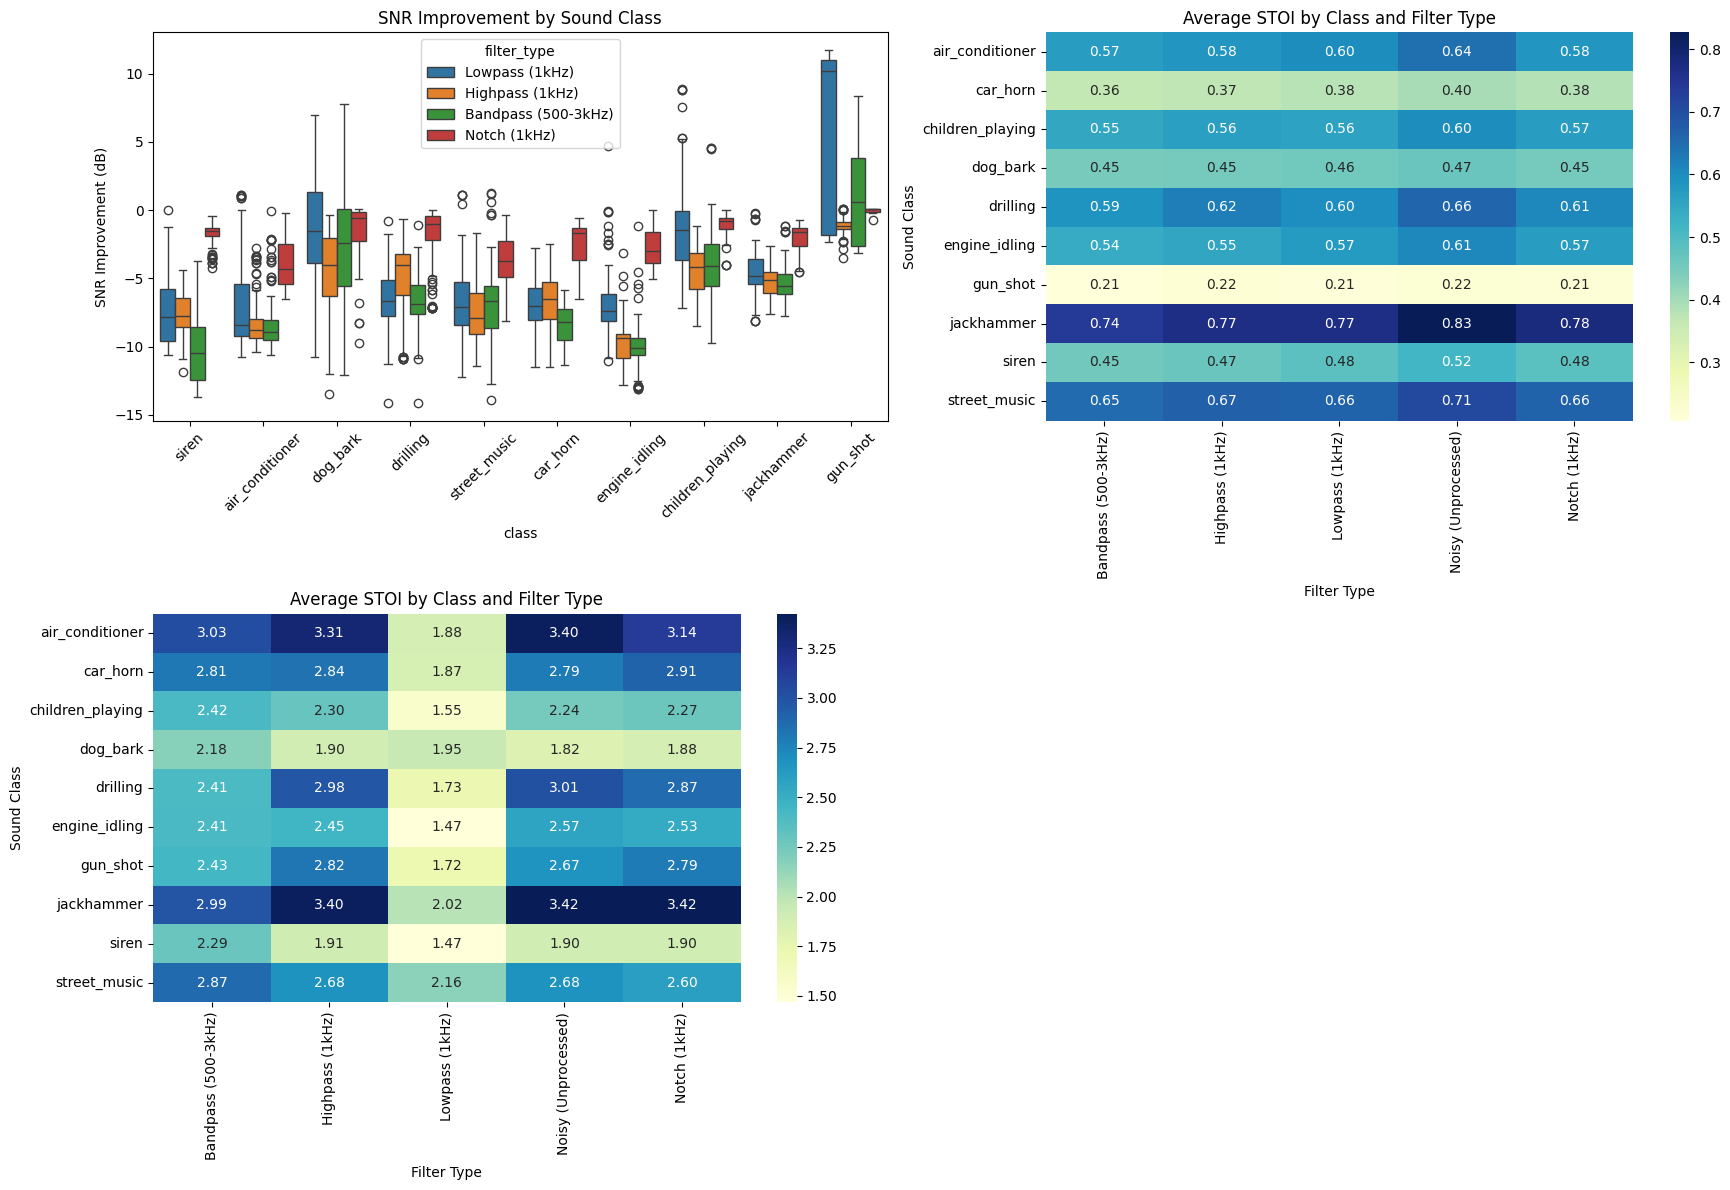


Performance Summary by Filter Type:
                     snr_improvement      stoi   pesq_nb
filter_type                                             
Noisy (Unprocessed)    -5.889445e-18  0.611530  2.587912
Notch (1kHz)           -2.256876e+00  0.572595  2.562247
Lowpass (1kHz)         -5.039294e+00  0.572001  1.789685
Highpass (1kHz)        -6.354765e+00  0.569104  2.591680
Bandpass (500-3kHz)    -6.527249e+00  0.552259  2.564373


In [48]:
from scipy.io import wavfile
from scipy.signal import resample

def enhanced_model_comparison(dataset):
    # Initialize storage with filter types
    metrics = {
        'clip_id': [],
        'class': [],
        'filter_type': [],
        'snr_before': [],
        'snr_after': [],
        'snr_improvement': [],
        'stoi': [],
        'pesq_nb': [],
    }

    for _ in range(8732):
        clip = dataset.choice_clip()
        if clip.fold != 1:
            continue
        audio_ori, sr = clip.audio
        class_label = clip.to_jams().annotations[0].data[0].value
        resampled_sr = 16000
        sec = len(audio_ori) / sr
        new_num = int(sec * resampled_sr) 
        audio = resample(audio_ori, new_num)

        # Add noise
        noise = np.random.normal(0, 0.1 * np.max(np.abs(audio)), len(audio))
        noisy = audio + noise
        snr_before = 10 * np.log10(np.var(audio) / np.var(noise))

        # Test all filter types
        filters = {
            'Noisy (Unprocessed)': noisy,  # Baseline
            'Lowpass (1kHz)': lowpass_filter(noisy, 1000, sr),
            'Highpass (1kHz)': highpass_filter(noisy, 1000, sr),
            'Bandpass (500-3kHz)': bandpass_filter(noisy, 500, 3000, sr),
            'Notch (1kHz)': notch_filter(noisy, 1000, sr),
        }

        for name, filtered in filters.items():
            metrics['clip_id'].append(clip.clip_id)
            metrics['class'].append(class_label)
            metrics['filter_type'].append(name)

            min_len = min(len(audio), len(filtered))
            audio = audio[:min_len]
            filtered = filtered[:min_len]

            # Calculate SNR
            snr_after = 10 * np.log10(np.var(audio) / np.var(filtered - audio))
            metrics['snr_before'].append(snr_before)
            metrics['snr_after'].append(snr_after)
            metrics['snr_improvement'].append(snr_after - snr_before)

            # STOI
            metrics['stoi'].append(stoi(audio, filtered, resampled_sr))
            # PESQ
            try:
                metrics['pesq_nb'].append(pesq(16000, audio, filtered, 'nb'))
                # metrics['pesq_wb'].append(pesq(16000, audio, filtered, 'wb'))
            except:
                metrics['pesq_nb'].append(None)

    df = pd.DataFrame(metrics)

    # 1. Bar chart for PESQ metrics
    plt.figure(figsize=(18, 12))
    avg_metrics = df.groupby('filter_type')[['snr_improvement', 'stoi', 'pesq_nb']].mean().reset_index()


    # 2. SNR improvement by class
    plt.subplot(2, 2, 1)
    sns.boxplot(data=df[df['filter_type'] != 'Noisy (Unprocessed)'],
                x='class', y='snr_improvement', hue='filter_type')
    plt.xticks(rotation=45)
    plt.title('SNR Improvement by Sound Class')
    plt.ylabel('SNR Improvement (dB)')

    # 3. STOI heatmap
    plt.subplot(2, 2, 2)
    pivot_df = df.pivot_table(index='class', columns='filter_type',
                              values='stoi', aggfunc='mean')
    sns.heatmap(pivot_df, annot=True, cmap='YlGnBu',
                annot_kws={"size": 10}, fmt='.2f')
    plt.title('Average STOI by Class and Filter Type')
    plt.xlabel('Filter Type')
    plt.ylabel('Sound Class')

    # 4. PESQ heatmap
    plt.subplot(2,2,3)
    pivot_df_pesq = df.pivot_table(index='class', columns='filter_type',
                              values='pesq_nb', aggfunc='mean')
    sns.heatmap(pivot_df_pesq, annot=True, cmap='YlGnBu',
                annot_kws={"size": 10}, fmt='.2f')
    plt.title('Average STOI by Class and Filter Type')
    plt.xlabel('Filter Type')
    plt.ylabel('Sound Class')

    plt.tight_layout()
    plt.show()

    return df

# Run enhanced visualization


results_df = enhanced_model_comparison(urbansound8k)
print("\nPerformance Summary by Filter Type:")
print(results_df.groupby('filter_type')[['snr_improvement', 'stoi', 'pesq_nb']].mean().sort_values('stoi', ascending=False))


#ALL CLIPS
# results_df = enhanced_model_comparison(urbansound8k, n_samples=8732)
# print("\nPerformance Summary by Filter Type:")
# print(results_df.groupby('filter_type')[['snr_improvement', 'stoi', 'pesq']].mean().sort_values('stoi', ascending=False))


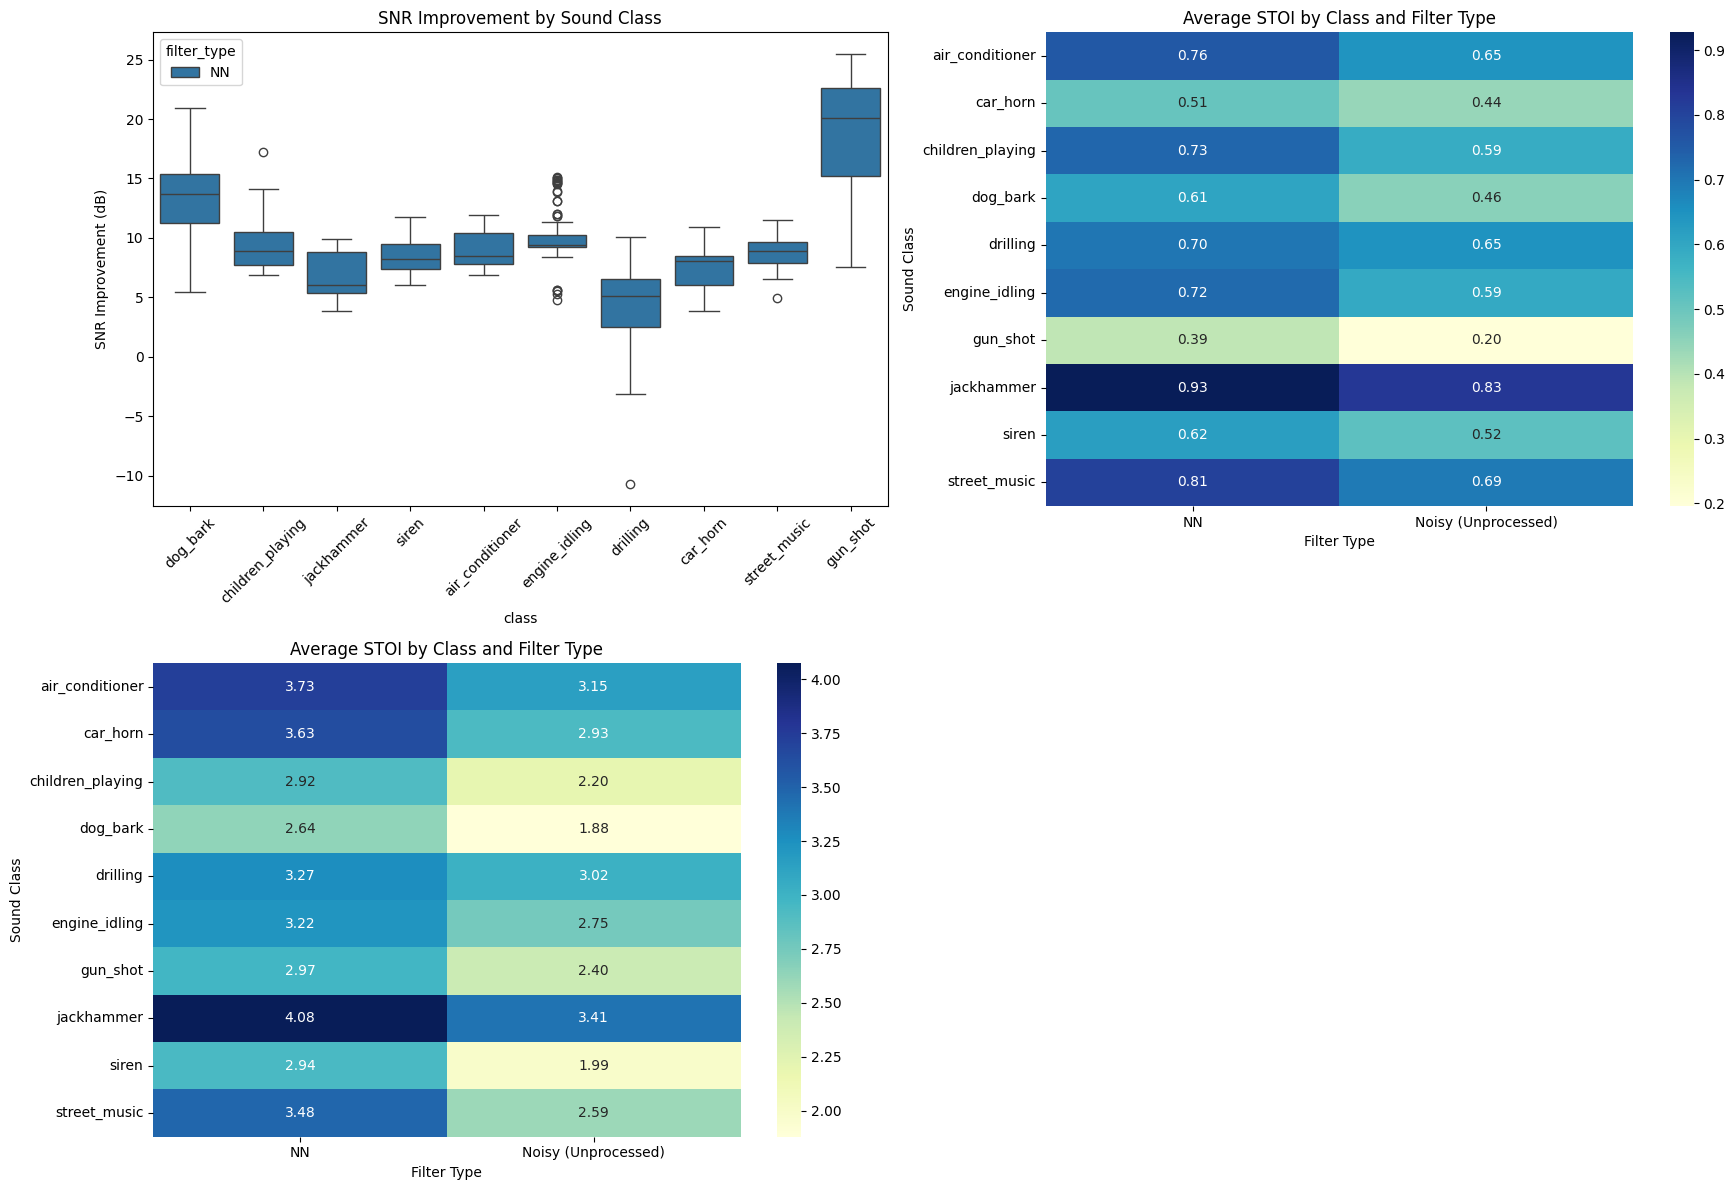


Performance Summary by Filter Type:
                     snr_improvement      stoi   pesq_nb
filter_type                                             
NN                      9.138355e+00  0.708856  3.262590
Noisy (Unprocessed)    -5.970307e-18  0.596249  2.581667


In [ ]:


def enhanced_model_comparison_NN(dataset):
    # Initialize storage with filter types
    metrics = {
        'clip_id': [],
        'class': [],
        'filter_type': [],
        'snr_before': [],
        'snr_after': [],
        'snr_improvement': [],
        'stoi': [],
        'pesq_nb': [],
    }

    for _ in range(8732):
        clip = dataset.choice_clip()
        if clip.fold != 1:
            continue
        audio_ori, sr = clip.audio
        class_label = clip.to_jams().annotations[0].data[0].value
        resampled_sr = 16000
        sec = len(audio_ori) / sr
        new_num = int(sec * resampled_sr) 
        audio = resample(audio_ori, new_num)

        enhanced_path = os.path.join('/data/users/tqiu5/CleanUNet/urbansound8k/audio/fold1_enhanced/speech_urban/150k',f'enhanced_fileid_{clip.slice_file_name}')
        sr1, enhanced_audio= wavfile.read(enhanced_path)
        # Add noise
        noise = np.random.normal(0, 0.1 * np.max(np.abs(audio)), len(audio))
        noisy = audio + noise
        snr_before = 10 * np.log10(np.var(audio) / np.var(noise))

        # Test all filter types
        filters = {
            'Noisy (Unprocessed)': noisy,
            'NN': enhanced_audio  # Baseline
        }

        for name, filtered in filters.items():
            metrics['clip_id'].append(clip.clip_id)
            metrics['class'].append(class_label)
            metrics['filter_type'].append(name)

            min_len = min(len(audio), len(filtered))
            audio = audio[:min_len]
            filtered = filtered[:min_len]

            # Calculate SNR
            snr_after = 10 * np.log10(np.var(audio) / np.var(filtered - audio))
            metrics['snr_before'].append(snr_before)
            metrics['snr_after'].append(snr_after)
            metrics['snr_improvement'].append(snr_after - snr_before)

            # STOI
            metrics['stoi'].append(stoi(audio, filtered, resampled_sr))
            # PESQ
            try:
                metrics['pesq_nb'].append(pesq(16000, audio, filtered, 'nb'))
                # metrics['pesq_wb'].append(pesq(16000, audio, filtered, 'wb'))
            except:
                metrics['pesq_nb'].append(None)

    df = pd.DataFrame(metrics)

    # 1. Bar chart for PESQ metrics
    plt.figure(figsize=(18, 12))
    avg_metrics = df.groupby('filter_type')[['snr_improvement', 'stoi', 'pesq_nb']].mean().reset_index()


    # 2. SNR improvement by class
    plt.subplot(2, 2, 1)
    sns.boxplot(data=df[df['filter_type'] != 'Noisy (Unprocessed)'],
                x='class', y='snr_improvement', hue='filter_type')
    plt.xticks(rotation=45)
    plt.title('SNR Improvement by Sound Class')
    plt.ylabel('SNR Improvement (dB)')

    # 3. STOI heatmap
    plt.subplot(2, 2, 2)
    pivot_df = df.pivot_table(index='class', columns='filter_type',
                              values='stoi', aggfunc='mean')
    sns.heatmap(pivot_df, annot=True, cmap='YlGnBu',
                annot_kws={"size": 10}, fmt='.2f')
    plt.title('Average STOI by Class and Filter Type')
    plt.xlabel('Filter Type')
    plt.ylabel('Sound Class')

    # 4. PESQ heatmap
    plt.subplot(2,2,3)
    pivot_df_pesq = df.pivot_table(index='class', columns='filter_type',
                              values='pesq_nb', aggfunc='mean')
    sns.heatmap(pivot_df_pesq, annot=True, cmap='YlGnBu',
                annot_kws={"size": 10}, fmt='.2f')
    plt.title('Average STOI by Class and Filter Type')
    plt.xlabel('Filter Type')
    plt.ylabel('Sound Class')

    plt.tight_layout()
    plt.show()

    return df

# Run enhanced visualization


results_df = enhanced_model_comparison_NN(urbansound8k)
print("\nPerformance Summary by Filter Type:")
print(results_df.groupby('filter_type')[['snr_improvement', 'stoi', 'pesq_nb']].mean().sort_values('stoi', ascending=False))


#ALL CLIPS
# results_df = enhanced_model_comparison(urbansound8k, n_samples=8732)
# print("\nPerformance Summary by Filter Type:")
# print(results_df.groupby('filter_type')[['snr_improvement', 'stoi', 'pesq']].mean().sort_values('stoi', ascending=False))
